In [2]:
import dash
import dash_core_components as dcc
import dash_html_components as html
import pandas as pd
import plotly.express as px

external_stylesheets = ['https://codepen.io/chriddyp/pen/bWLwgP.css']

app = dash.Dash(__name__, external_stylesheets=external_stylesheets)

import pickle
fig_data=pickle.load(open("./interpretML/fig_data.pkl","rb"))

# data=fig_data["mli"][0]['value']["feature_list"][0]

# names만 하나의 값이 더 많은 현상, 이를 수정하는 로직이 필요함
# 그러나 어떤 규칙인지 알 수 없음. 관찰한 결과는 실제 값이 없는 영역에 일정한 간격을 채우기 위해 만들어 주는 것으로 보임.
data=fig_data["specific"][2]

data.keys()

data.pop("type")

scores_range=data.pop("scores_range")

density=data.pop("density")

data['names']=data['names'][:-1]

data=pd.DataFrame(data)

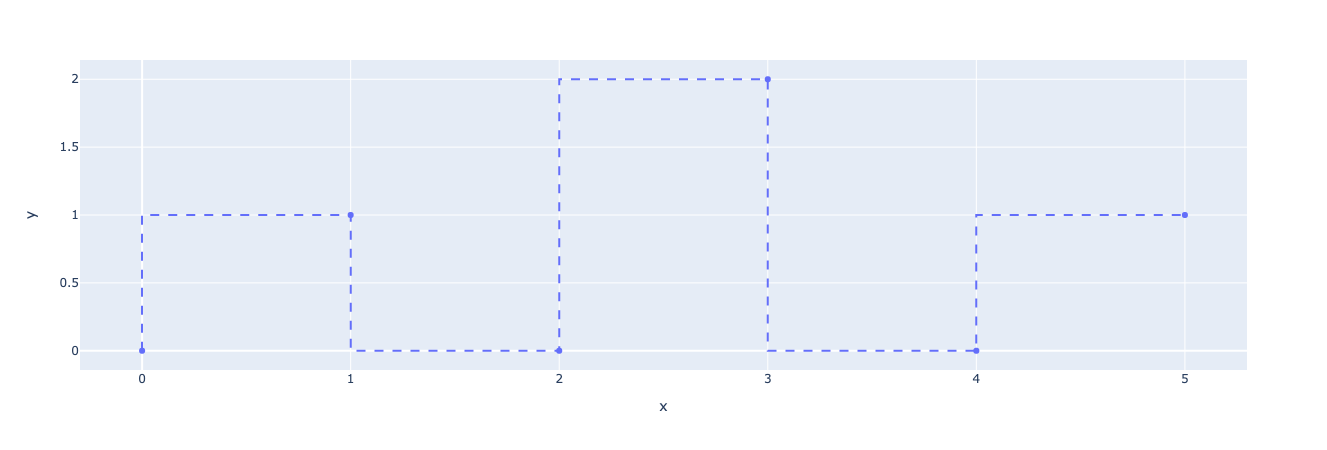

In [39]:
import plotly.express as px

fig = px.line(x=[0,1,2,3,4,5], y=[0,1,0,2,0,1])
fig.update_traces(mode="markers+lines", line_shape="vh", line_dash="dash")
fig.show()

In [40]:
df = pd.read_csv('https://plotly.github.io/datasets/country_indicators.csv')

available_indicators = df['Indicator Name'].unique() # 나중에 'Sort Features By' 부분 개발할 때 사용할 피처

In [41]:
df

Country Name                                     Indicator Name  Year  \
0       Arab World                Agriculture, value added (% of GDP)  1962   
1       Arab World             CO2 emissions (metric tons per capita)  1962   
2       Arab World  Domestic credit provided by financial sector (...  1962   
3       Arab World        Electric power consumption (kWh per capita)  1962   
4       Arab World       Energy use (kg of oil equivalent per capita)  1962   
...            ...                                                ...   ...   
36955     Zimbabwe                   Industry, value added (% of GDP)  2007   
36956     Zimbabwe                 Inflation, GDP deflator (annual %)  2007   
36957     Zimbabwe            Life expectancy at birth, total (years)  2007   
36958     Zimbabwe  Population density (people per sq. km of land ...  2007   
36959     Zimbabwe             Services, etc., value added (% of GDP)  2007   

           Value  
0            NaN  
1       0.760996  
2      18.168690  
3            NaN  
4            NaN  
...          ...  
36955  33.074953  
36956   0.894887  
36957  44.177756  
36958  34.374559  
36959  45.327139  

[36960 rows x 4 columns]

In [170]:
import plotly.graph_objects as go

from plotly.subplots import make_subplots

def create_time_series_test(dff, title):

    trace1 = go.Line(
        x=dff['names'],
        y=dff['scores'],
        name='scores',
        marker=dict(
            color='rgb(34,163,192)',
            size=1),
        line_shape="vh",
        line_dash="solid"
    )
    trace2 = go.Scatter(
        x=dff['names'],
        y=dff['upper_bounds'],
        name='upper_bounds',
        marker=dict(
            color='rgb(12,100,100)',
            size=0.1),
        line_shape="vh",
        line_dash="solid"
    )
    
    trace3 = go.Scatter(
        x=dff['names'],
        y=dff['lower_bounds'],
        name='lower_bounds',
        marker=dict(
            color='rgb(200,1,100)',
            size=0.1),
        line_shape="vh",
        line_dash="solid"
    )
    
    fig = make_subplots()
    fig.add_trace(trace1)
    fig.add_trace(trace2)
    fig.add_trace(trace3)

    fig.update_xaxes(showgrid=False)


#     fig.add_annotation(x=0, y=0.85, xanchor='left', yanchor='bottom',
#                        xref='paper', yref='paper', showarrow=False, align='left',
#                        bgcolor='rgba(255, 255, 255, 0.5)', text=title)

    fig.update_layout(height=225, yaxis_range=list(scores_range))

    return fig

In [173]:
import random

In [178]:
random.randint(1,1000)

361

In [171]:
dd=create_time_series_test(data, title="teete")

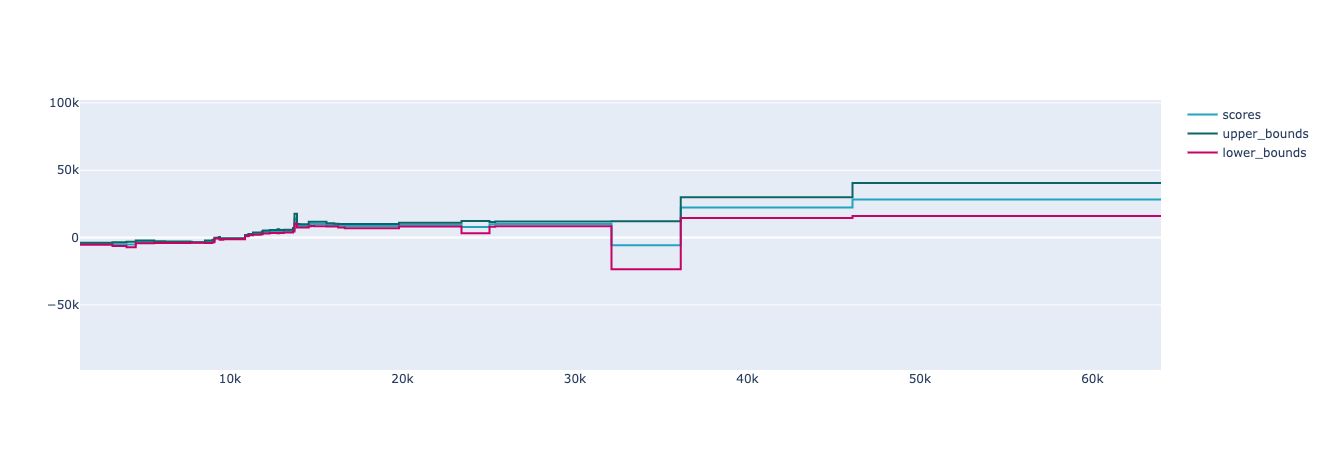

In [172]:
dd.show()

In [1]:
app.layout = html.Div([
    html.Div([
        dcc.Graph(id='x-time-series'),
        dcc.Graph(id='y-time-series'),
    ], style={'display': 'inline-block', 'width': '49%'}),
])


@app.callback(
    [dash.dependencies.Input('crossfilter-xaxis-column', 'value'),
     dash.dependencies.Input('crossfilter-yaxis-column', 'value'),
     dash.dependencies.Input('crossfilter-xaxis-type', 'value'),
     dash.dependencies.Input('crossfilter-yaxis-type', 'value'),])




# def update_graph(xaxis_column_name, yaxis_column_name,
#                  xaxis_type, yaxis_type,
#                  year_value):
#     dff = df[df['Year'] == year_value]

#     fig = px.scatter(x=dff[dff['Indicator Name'] == xaxis_column_name]['Value'],
#             y=dff[dff['Indicator Name'] == yaxis_column_name]['Value'],
#             hover_name=dff[dff['Indicator Name'] == yaxis_column_name]['Country Name']
#             )

# #    fig.update_traces(customdata=dff[dff['Indicator Name'] == yaxis_column_name]['Country Name'])

#     fig.update_xaxes(title=xaxis_column_name, type='linear' if xaxis_type == 'Linear' else 'log')

#     fig.update_yaxes(title=yaxis_column_name, type='linear' if yaxis_type == 'Linear' else 'log')

#     fig.update_layout(margin={'l': 40, 'b': 40, 't': 10, 'r': 0}, hovermode='closest')

#     return fig




# import plotly.express as px

# fig = px.line(x=[0,1,2,3,4,5], y=[0,1,0,2,0,1])
# fig.update_traces(mode="markers+lines", line_shape="vh", line_dash="dash")
# fig.show()


def create_time_series(dff, axis_type, title):

    fig = px.scatter(dff, x='Year', y='Value')

    fig.update_traces(mode="markers+lines", line_shape="vh", line_dash="dash")

    fig.update_xaxes(showgrid=False)

    fig.update_yaxes(type='linear' if axis_type == 'Linear' else 'log')

    fig.add_annotation(x=0, y=0.85, xanchor='left', yanchor='bottom',
                       xref='paper', yref='paper', showarrow=False, align='left',
                       bgcolor='rgba(255, 255, 255, 0.5)', text=title)

    fig.update_layout(height=225, margin={'l': 20, 'b': 30, 'r': 10, 't': 10})

    return fig


@app.callback(
    dash.dependencies.Output('x-time-series', 'figure'),
    [dash.dependencies.Input('crossfilter-indicator-scatter', 'hoverData'),
     dash.dependencies.Input('crossfilter-xaxis-column', 'value'),
     dash.dependencies.Input('crossfilter-xaxis-type', 'value')])


def update_y_timeseries(hoverData, xaxis_column_name, axis_type):
    country_name = hoverData['points'][0]['customdata']
    dff = df[df['Country Name'] == country_name]
    dff = dff[dff['Indicator Name'] == xaxis_column_name]
    title = '<b>{}</b><br>{}'.format(country_name, xaxis_column_name)
    return create_time_series(dff, axis_type, title)


@app.callback(
    dash.dependencies.Output('y-time-series', 'figure'),
    [dash.dependencies.Input('crossfilter-indicator-scatter', 'hoverData'),
     dash.dependencies.Input('crossfilter-yaxis-column', 'value'),
     dash.dependencies.Input('crossfilter-yaxis-type', 'value')])



def update_x_timeseries(hoverData, yaxis_column_name, axis_type):
    dff = df[df['Country Name'] == hoverData['points'][0]['customdata']]
    dff = dff[dff['Indicator Name'] == yaxis_column_name]
    return create_time_series(dff, axis_type, yaxis_column_name)

In [ ]:
if __name__ == '__main__':
    app.run_server(debug=True,port=8001)